# <center>  Python for biologists
    
## Homework 11, Visualisation



## –ü—Ä–∞–≤–∏–ª–∞

- **–ù–µ —Å–æ–∑–¥–∞–≤–∞–π—Ç–µ –¥–æ–ø. –≤–µ—Ç–æ–∫ –≤ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–∏, –Ω–µ –∫–æ–ø–∏—Ä—É–π—Ç–µ –Ω–æ—É—Ç–±—É–∫.**
- –ü–∏—à–∏—Ç–µ –∫–æ–¥ —Ç–æ–ª—å–∫–æ —Ç–∞–º, –≥–¥–µ —ç—Ç–æ –æ—Ç –≤–∞—Å —Ç—Ä–µ–±—É–µ—Ç—Å—è (`# YOUR CODE HERE`)
- –ù–µ –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–π—Ç–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –µ—Å–ª–∏ –æ–Ω–∏ —É–∂–µ —Å–æ–∑–¥–∞–Ω—ã. –ü—Ä–æ–∏—Å—Ö–æ–¥—è—Ç –∞–≤—Ç–æ–ø—Ä–æ–≤–µ—Ä–∫–∏.
- –ü–µ—Ä–µ–¥ –æ—Ç–ø—Ä–∞–≤–∫–æ–π –ø—Ä–æ–≤–µ—Ä—å—Ç–µ —á—Ç–æ –≤–∞—à –Ω–æ—É—Ç–±—É–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç (—é–ø–∏—Ç–µ—Ä-–Ω–æ—É—Ç–±—É–∫). –ù–∞–∂–º–∏—Ç–µ –Ω–∞ –ø–∞–Ω–µ–ª–∏ —Å–≤–µ—Ä—Ö—É `Kernel` -> `Restart Kernel and Run All Cells...`. –ü—Ä–æ–≤–µ—Ä—å–µ —á—Ç–æ –Ω–µ—Ç –æ—à–∏–±–æ–∫.
    

#### –ü–æ–≥–Ω–∞–ª–∏!

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# –∑–¥–µ—Å—å –ª—é–±—ã–µ –∏–º–ø–æ—Ä—Ç—ã –∫–æ—Ç–æ—Ä—ã–µ –≤–∞–º –µ—â–µ –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è (—Ç–æ–ª—å–∫–æ –∑–¥–µ—Å—å)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø–æ –±–∏–æ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏—á–µ—Å–∫–∏–º –¥–∞–Ω–Ω—ã–º

## Heatmap

- –î–∞–Ω–Ω—ã–µ: `DE_data_1.tsv`

<img src="heatmap.png" align="center" width="500" >

In [2]:
# –≠—Ç–æ –º–µ—Ç–∞-–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± –æ–±—Ä–∞–∑—Ü–∞—Ö
meta = pd.DataFrame({'ENCFF240NOH': ('TAP pre-treated', 1), 
                     'ENCFF245SJH': ('TAP pre-treated', 2), 
                     'ENCFF321FEM': ('No treat', 1), 
                     'ENCFF368OTJ': ('No treat', 2), 
                     'ENCFF711LJB': ('AP-TAP pre-treated', 1), 
                     'ENCFF826APU': ('AP-TAP pre-treated', 2)}, index=['Sample', 'Replicate']).T
meta

Sample Replicate
ENCFF240NOH     TAP pre-treated         1
ENCFF245SJH     TAP pre-treated         2
ENCFF321FEM            No treat         1
ENCFF368OTJ            No treat         2
ENCFF711LJB  AP-TAP pre-treated         1
ENCFF826APU  AP-TAP pre-treated         2

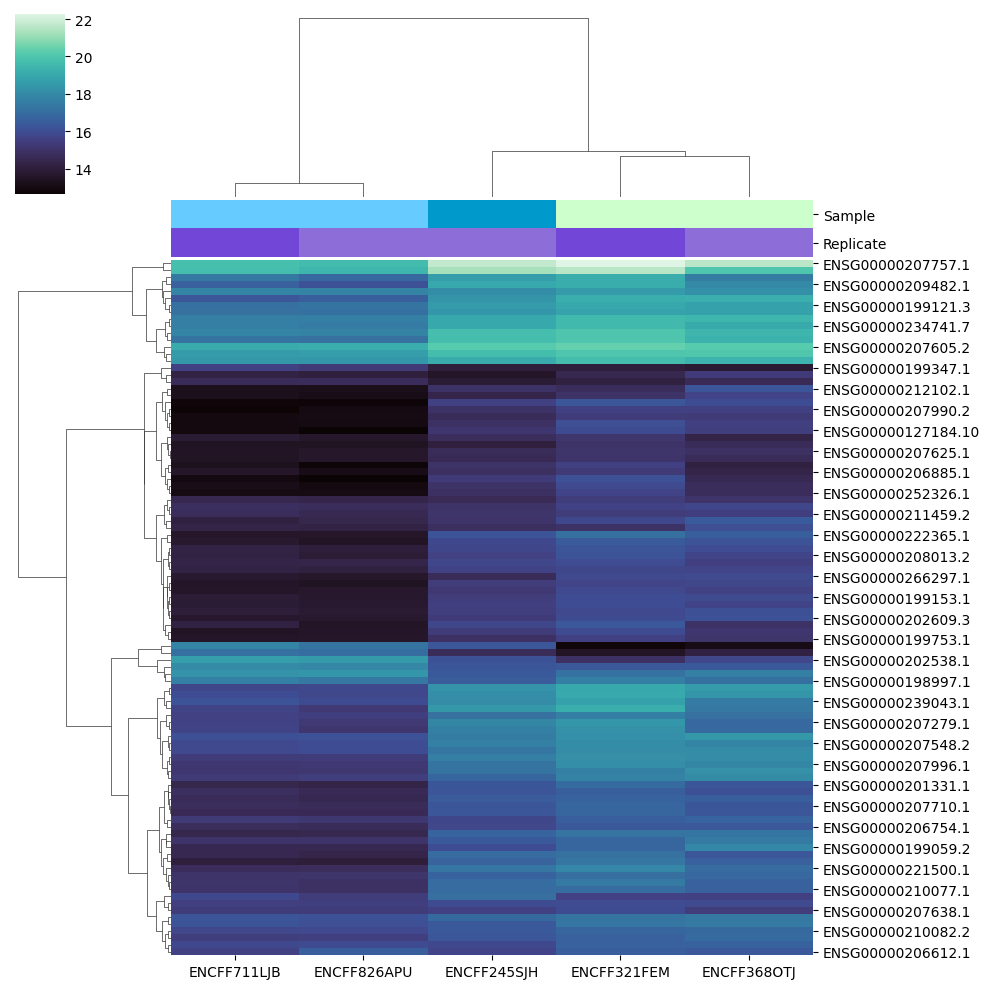

In [3]:
data = pd.read_csv('data/DE_data_1.tsv', sep='\t')
data_values = data.iloc[:, 1:]

top_100_genes = data_values.sum(axis=1).sort_values(ascending=False).head(100).index

filtered_data = data.loc[top_100_genes]
filtered_data = filtered_data.rename(columns={'Unnamed: 0': ''})

COLORS_DICT = {'TAP pre-treated': '#0099CC', 'No treat': '#CCFFCC', 'AP-TAP pre-treated': '#66CCFF'}
COLORS_DICT_SUB = {1: '#7247D7', 2: '#8D6DD7'}

colors_samples = meta['Sample'].map(COLORS_DICT)
colors_replicates = meta['Replicate'].map(COLORS_DICT_SUB)

colors = pd.merge(colors_samples.reset_index(), colors_replicates.reset_index())
colors = colors.set_index('index')

sns.clustermap(filtered_data.set_index('').iloc[:, 1:], cmap='mako', method='ward', figsize=(10, 10), col_colors=colors)

plt.show()

## Volcano plot

- –î–∞–Ω–Ω—ã–µ: `DE_data_2.gz`

<img src="volcano_plot.png" align="center" width="500" >

In [4]:
# YOUR CODE HERE
# –º–æ–∂–µ—Ç–µ —Å–æ–∑–¥–∞–≤–∞—Ç—å –¥–æ–ø. —è—á–µ–π–∫–∏, –Ω–æ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø–µ—Ä–µ–¥ –æ—Ç–ø—Ä–∞–≤–∫–æ–π —Å–æ–±–µ—Ä–∏—Ç–µ –≤—Å—ë –≤ –æ–¥–Ω—É

## –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤

In [5]:
# YOUR CODE HERE
# –º–æ–∂–µ—Ç–µ —Å–æ–∑–¥–∞–≤–∞—Ç—å –¥–æ–ø. —è—á–µ–π–∫–∏, –Ω–æ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø–µ—Ä–µ–¥ –æ—Ç–ø—Ä–∞–≤–∫–æ–π —Å–æ–±–µ—Ä–∏—Ç–µ –≤—Å—ë –≤ –æ–¥–Ω—É

---
# EDA

–ü–æ–∫–∞–∂–∏—Ç–µ —Ç—É—Ç, —á—Ç–æ —É –≤–∞—Å –ø–æ–ª—É—á–∏–ª–æ—Å—å!

> –ü–æ –∏–¥–µ–µ, –≤–∞–º –Ω—É–∂–Ω–æ —Ç–æ–ª—å–∫–æ –∑–∞–ø—É—Å—Ç–∏—Ç—å —è—á–µ–π–∫—É –∏ –≤—Å—ë. –ù–æ –º–æ–∂–µ—Ç–µ –∏–∑–º–µ–Ω–∏—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ.

In [6]:
# –ú–æ–∂–µ—Ç–µ –≤—Å—Ç–∞–≤–∏—Ç—å –ª—é–±–æ–π —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω—ã–π –¥–∞—Ç–∞-—Ñ—Ä–µ–π–º –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ :)
data_dir = 'https://raw.githubusercontent.com/Python-BI-2023/course_materials/main/data/'
df = pd.read_csv(data_dir + 'titanic.csv')

üññ Greetings, Earthling!

üë®üèª‚ÄçüíªAccording to my calculations, in the observed table 
The number of observations/rows is 418 
The number of parameters/columns is 11

ü§ñCategorical columns:['Pclass', 'Sex', 'Embarked']
ü§ñNumerical columns:['Age', 'SibSp', 'Parch', 'Fare']
ü§ñString columns:['PassengerId', 'Name', 'Ticket', 'Cabin']

üßÆCounts: Pclass
3    218
1    107
2     93
Name: count, dtype: int64

üßÆFrequencies: Pclass
3    0.521531
1    0.255981
2    0.222488
Name: proportion, dtype: float64

üßÆCounts: Sex
male      266
female    152
Name: count, dtype: int64

üßÆFrequencies: Sex
male      0.636364
female    0.363636
Name: proportion, dtype: float64

üßÆCounts: Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

üßÆFrequencies: Embarked
S    0.645933
C    0.244019
Q    0.110048
Name: proportion, dtype: float64

üî¢Age statistics:
üìâMin: 0.17
üìàMax: 76.0
üòíMean: 30.272590361445783
‚úçüèºStd: 14.181209235624422
üìäQ0.25: 21.0
‚öñÔ∏èMedian:

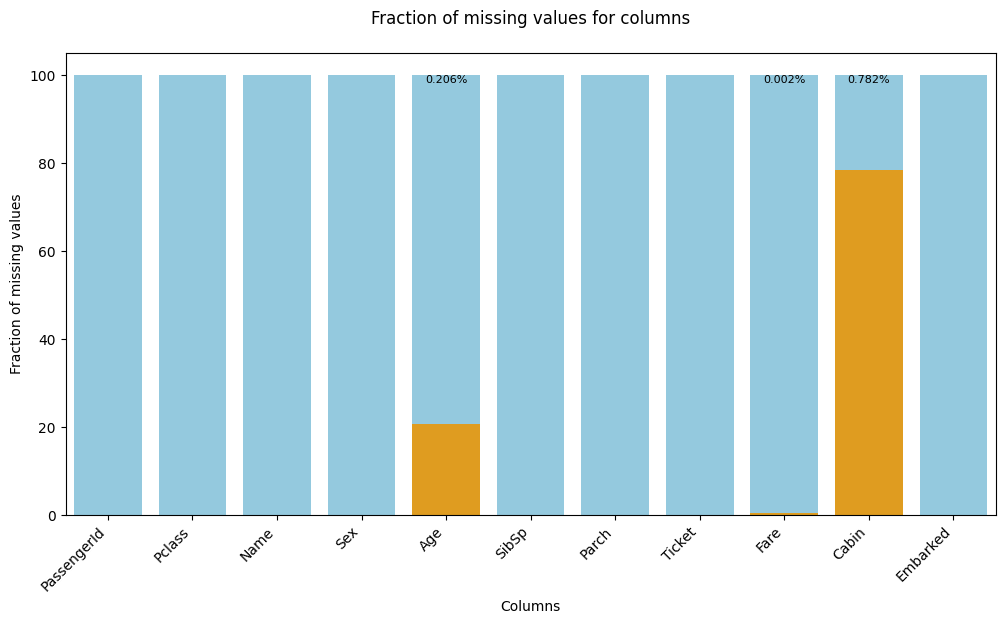

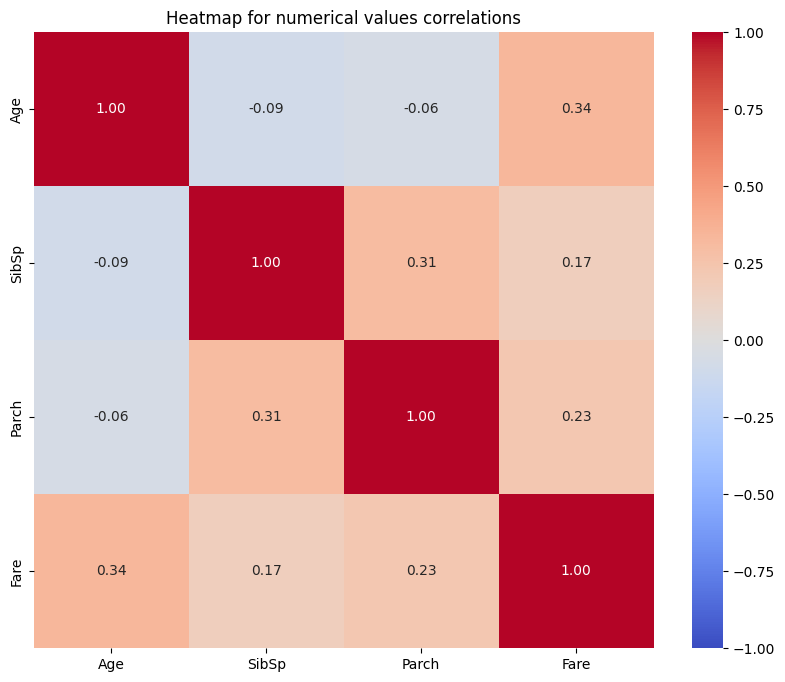

In [7]:
from my_awesome_eda import run_eda

run_eda(df)